Вариант 4.
Найти все интервалы между появлениями цифры 1 в первом миллионе знаков числа
пи https://www.piday.org/million/.

Аппроксимировать равномерным на целых числах (randint), планковским (plank), логарифмическим (logser) распределением.

Вывести вероятности для полученных аппроксимаций вместе с гистограммой, посчитать среднее значение логарифмической функции правдоподобия.


In [1]:
import requests
import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, planck, logser
from scipy import stats

In [2]:
# Парсинг числа пи с сайта

# URL для запросов
base_url = "https://www.piday.org/wp-json/millionpi/v1/million?action=example_ajax_request&page="

# Переменная для хранения числа пи
pi_text = ""

# Проходим по страницам от 1 до 20
for page in range(1, 21):
    # Формируем URL для каждой страницы
    ajax_url = base_url + str(page)

    # Выполняем запрос
    response = requests.get(ajax_url)

    # Пироверка успешности запроса
    if response.status_code == 200:
        # Добавляем текст из ответа к общему числу
        pi_text += response.text

    # Пауза, чтобы избежать блокировки от сервера
    time.sleep(0.5)

In [3]:
# Число символов, собранных в результате запроса
print(f"Всего собрано {len(pi_text)} символов.")

Всего собрано 1000042 символов.


In [4]:
# Выводим нечисловые символы, чтобы понять, какие лишние
print(''.join([char for char in pi_text if not char.isdigit()]))

"."""""""""""""""""""""""""""""""""""""""


In [5]:
# Удаляем двойные ковычки из строк
pi_text = pi_text.replace('"', '')

# Вывод первых и последних 100 символов числа пи, чтобы проверить его достоверность
print(pi_text[:100])
print(pi_text[-100:])

# Проверка, сколько символов осталось в результате проверки
print(f"Всего собрано {len(pi_text)} символов.")

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706
0315614033321272849194418437150696552087542450598956787961303311646283996346460422090106105779458151
Всего собрано 1000002 символов.


In [6]:
# Индексы, где есть цифра '1'
indices_of_one = [i for i, digit in enumerate(pi_text) if digit == '1']

# Рассчет интервалов между последовательными появлениями '1'
intervals = np.diff(indices_of_one) - 1

intervals

array([ 1, 33,  2, ...,  2,  8,  1])

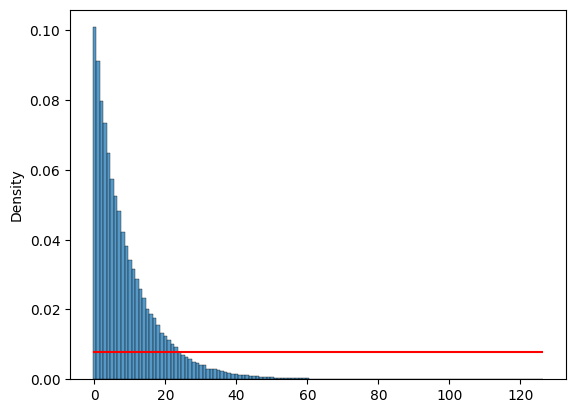

Среднее значение логарифма правдоподобия -4.84


In [7]:
# Равномерное на всех числах (randint) распределение
sns.histplot(intervals, stat='density', discrete=True)
T=range(max(intervals) + 1)
plt.plot(T, stats.randint.pmf(T, min(intervals), max(intervals) + 1), color='red')
plt.show()

u=sum(stats.randint.logpmf(intervals, min(intervals), max(intervals) + 1))/len(intervals)
print('Среднее значение логарифма правдоподобия {:.3}'.format(u))

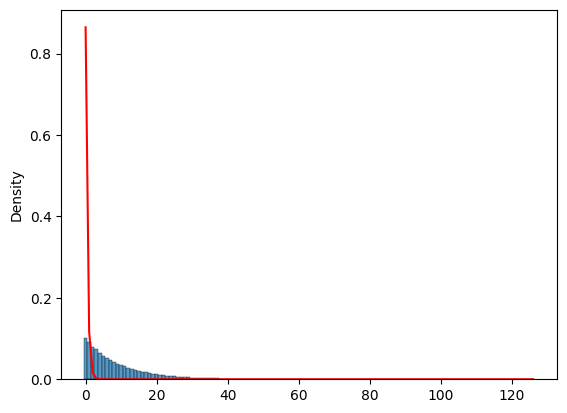

Среднее значение логарифма правдоподобия -18.2


In [8]:
# Планковское (plank) распределение
a = 2.0
sns.histplot(intervals, stat='density', discrete=True)
T=range(min(intervals),max(intervals)+1)
plt.plot(T,stats.planck.pmf(T,a), color='red')
plt.show()

u=sum(stats.planck.logpmf(intervals, a))/len(intervals)
print('Среднее значение логарифма правдоподобия {:.3}'.format(u))

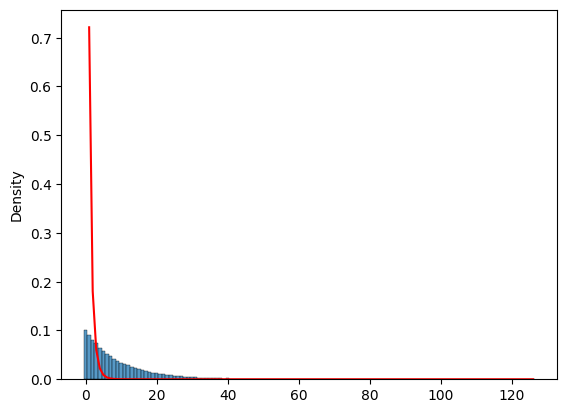

Среднее значение логарифма правдоподобия -inf


In [9]:
# Логарифмическое (logser) распределение
a = 0.5
sns.histplot(intervals, stat='density', discrete=True)
T = range(1, max(intervals) + 1)  # logser определен для положительных целых чисел
plt.plot(T, stats.logser.pmf(T, a), color='red')
plt.show()

u = sum(stats.logser.logpmf(intervals, a)) / len(intervals)
print('Среднее значение логарифма правдоподобия {:.3}'.format(u))